<a href="https://colab.research.google.com/github/Layravbf/MachineLearning-KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
lista = df.values.tolist()
# lista

In [ ]:
def countclasses(lista):
    setosa=0
    versicolor=0
    virginica=0
    for i in range(len(lista)):
        if lista[i][4] == 0.0:
            setosa += 1
        if lista[i][4] == 1.0:
            versicolor += 1
        if lista[i][4] == 2.0:
            virginica += 1
    
    return [setosa,versicolor,virginica]

In [ ]:
setosa,versicolor, virginica = countclasses(lista)
print('Setosa:',setosa)
print('Versicolor:',versicolor)
print('Virginica:',virginica)

Setosa: 50
Versicolor: 50
Virginica: 50


In [ ]:
p=0.6
setosa,versicolor, virginica = countclasses(lista)
treinamento, teste= [], []
max_setosa, max_versicolor, max_virginica = int(p*setosa), int(p*versicolor), int(p*virginica)
total1 =0
total2 =0
total3 =0
for lis in lista:
    if lis[-1]==0.0 and total1< max_setosa:
        treinamento.append(lis)
        total1 +=1
    elif lis[-1]==1.0 and total2<max_versicolor:
        treinamento.append(lis)
        total2 +=1
    elif lis[-1]==2.0 and total3<max_virginica:
        treinamento.append(lis)
        total3 +=1
    else:
        teste.append(lis)

In [ ]:
import math
def dist_euclidiana(v1,v2):
    dim, soma = len(v1), 0
    for i in range(dim -1):
        soma += math.pow(v1[i] -v2[i],2)
    return math.sqrt(soma)

In [ ]:
def knn(treinamento, nova_amostra, K):
    dists, len_treino = {}, len(treinamento)
    
    for i in range(len_treino):
        d= dist_euclidiana(treinamento[i], nova_amostra)
        dists[i] = d
    
    k_vizinhos = sorted(dists, key= dists.get)[:K]

    qtd_setosa, qtd_versicolor, qtd_virginica = 0, 0, 0
    for indice in k_vizinhos: 
        if treinamento[indice][-1] ==0.0:
            qtd_setosa +=1
        elif treinamento[indice][-1] ==1.0:
            qtd_versicolor +=1
        else:
            qtd_virginica +=1
    a=[qtd_setosa, qtd_versicolor, qtd_virginica]
    return a.index(max(a))

In [ ]:
acertos, K = 0, 70
for amostra in teste:
    classe = knn(treinamento, amostra, K)
#     print(classe)
    if amostra[-1]==classe:
        acertos +=1
print("Porcentagem de acertos:",100*acertos/len(teste))

Porcentagem de acertos: 65.0


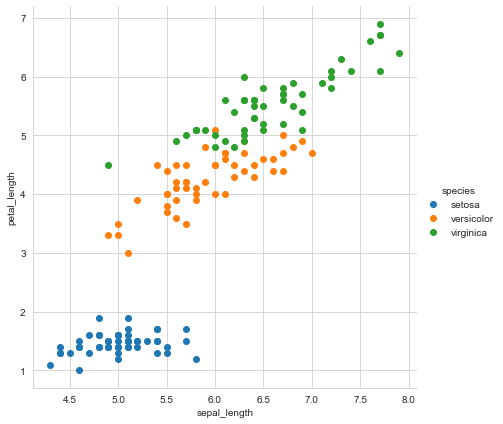

In [ ]:
import seaborn as sns
 
iris = sns.load_dataset('iris')
 
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

C:\Users\layra\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)
C:\Users\layra\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


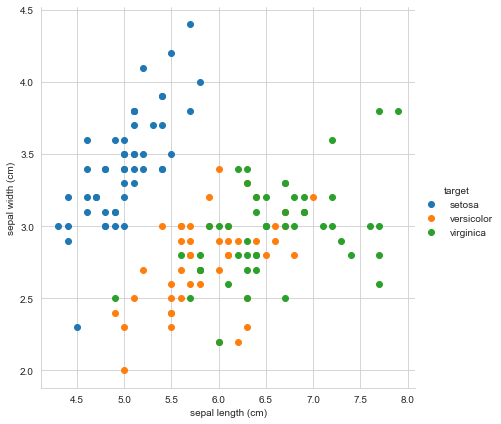

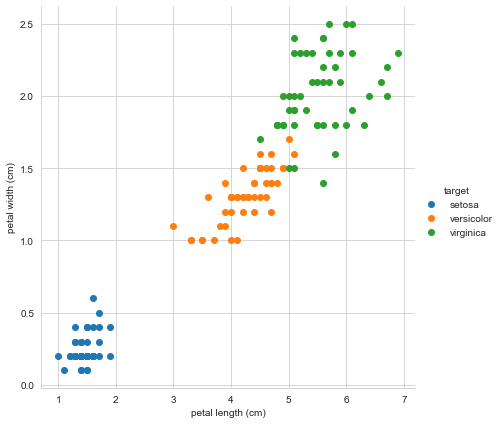

In [ ]:
import seaborn as sns
sns.FacetGrid(df, height=6,hue="target").map(plt.scatter,"sepal length (cm)","sepal width (cm)").add_legend(labels=['setosa', 'versicolor', 'virginica'])
sns.FacetGrid(df, height=6,hue="target").map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend(labels=['setosa', 'versicolor', 'virginica'])